In [1]:
library(ggplot2)
library(reshape)
library(viridis)
library(ggpubr)

Loading required package: viridisLite
Loading required package: magrittr


In [2]:
data_path <- "/home/anat/Research/ExAC/12.Figures/Models_corr_heatmap/models_prob_tables/"
models <- c("RF", "ADA", "SVM", "Logistic", "KNN", "XGB","NN")
ligands_list <- c("dna", "rna", "ion", "peptide", "sm")

file saved to plots/models_tuned_heatmap.png


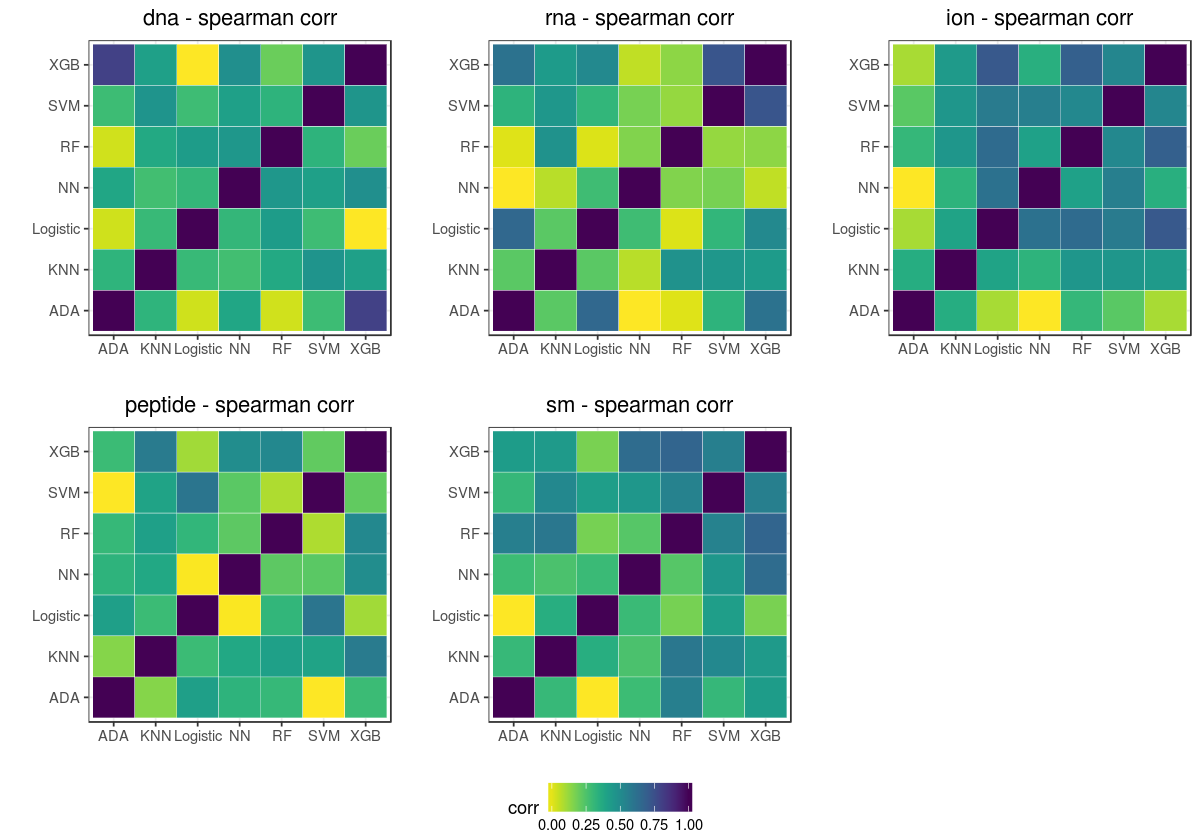

In [3]:
ligand_data <- list()
plots_list <- list()
for (i in 1:length(ligands_list)) {

    #Read the ligands datasets
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_models_prob.csv")
    ligand_data[[i]] <- read.csv(paste0(data_path,ligand_filename), header = TRUE, sep = '\t', row.names = 1)

    #Create the correlation df
    corr_mat <- matrix(ncol=3, nrow=(length(models)*length(models)))
    row_cnt <-1
    for (j in 1:length(models)) {
        model1 <- models[[j]]
        for (k in 1:length(models)) {
            model2 <- models[[k]]
            corr <- cor.test(ligand_data[[i]][[model1]], ligand_data[[i]][[model2]], method="spearman", exact=FALSE)
            corr_val <- corr$estimate
            corr_mat[row_cnt,1] <- model1
            corr_mat[row_cnt,2] <- model2
            corr_mat[row_cnt,3] <- corr_val
            row_cnt <- row_cnt + 1
        }
    }
    corr_df <- as.data.frame(corr_mat)
    colnames(corr_df) <- c("model1", "model2", "corr")

    #Make sure correlations are defined as numeric
    corr_df$corr<- as.numeric(paste(corr_df$corr))

    plots_list[[i]] <- ggplot(corr_df, aes(x=model1, y=model2)) +
        geom_tile(aes(fill=corr), color="white") +
        scale_fill_viridis(direction=-1) +
        ggtitle(paste0(ligand, " - spearman corr")) +
        xlab("") +
        ylab("") +
        theme_bw() +
        theme(plot.title = element_text(hjust = 0.5))
}
options(repr.plot.width=10, repr.plot.height=7)
final_fig <- ggarrange(plotlist=plots_list[1:5], ncol = 3, nrow=2, common.legend = TRUE, legend="bottom")
final_fig
ggexport(final_fig, filename="plots/models_tuned_heatmap.png", width = 1000, height = 700, res=100)